In [ ]:
#All files:
# 1) "C:\Users\Bradley\Videos\New folder\AgBH_cali_5m_13.5kev_2_1961.7s_RH661.032_x0.300_th0.000_5.00s_458795_waxs.tiff"
# 2) "C:\Users\Bradley\Videos\New folder\AgBH_cali_5m_13.5kev_6_2795.4s_RH-28.010_x0.300_th0.000_5.00s_458825_saxs.tiff"
# 3) "C:\Users\Bradley\Videos\New folder\AgBH_cali_5m_13.5kev_WAXSx-193_y22_x0.300_th0.000_5.00s_1000930_waxs.tiff"
# 4) "C:\Users\Bradley\Videos\New folder\AgBH_cali_5m_13.5kev_x0.000_y0.000_10.00s_988715_saxs.tiff"
# 5) "C:\Users\Bradley\Videos\New folder\AgBH_cali_5m_13.5kev_x0.000_y0.000_10.00s_988715_waxs.tiff"

In [130]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import math

In [131]:
img = Image.open(r"C:\Users\Bradley\Videos\New folder\AgBH_cali_5m_13.5kev_x0.000_y0.000_10.00s_988715_waxs.tiff")
#for the image you just insert the file path. On Windows 10 this is found by left clicking once on an image and then going above it and finding where it says "copy path"
#take the path and insert it (with the quotations included) after r into the Image.open(r) function
#so like "Image.open(r"C:\filename")
img1 = img.convert('I') # 'I' : 32-bit integer pixels
img1.show()

In [132]:
img2 = np.asarray(Image.open("/Users/Bradley/Videos/New folder/AgBH_cali_5m_13.5kev_x0.000_y0.000_10.00s_988715_waxs.tiff"))
# for numpy version of file all backslashes turned in forward slashes. Also no "r" and C: as shown in cell 1.

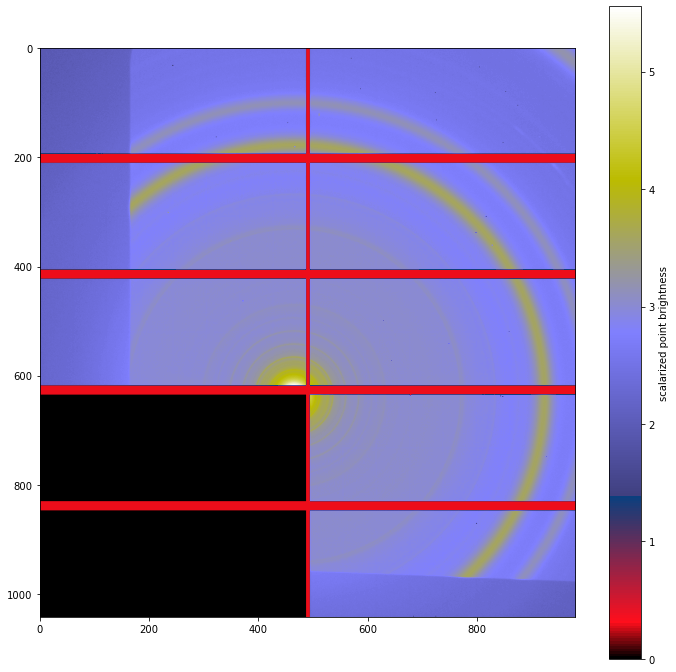

In [125]:
infile1="/Users/Bradley/Videos/New folder/"
infile2="AgBH_cali_5m_13.5kev_x0.000_y0.000_10.00s_988715_waxs.tiff"
infile3=infile1+infile2
compare_img=Image.open(infile3).convert("I")
compare_img=np.asarray(compare_img).astype(float)



plt.figure(10, figsize=(12,12)); plt.clf()
plt.imshow(np.log10(compare_img+3), cmap="gist_stern") #for this scenario the number makes little difference. We just want to see the rings and center.
#changing the number changes the shading but the center is visible regardless of what it is
plt.colorbar(label="scalarized point brightness")

Enter guess for horizontal coordinate of center: 470
Enter guess for vertical coordinate of center: 630


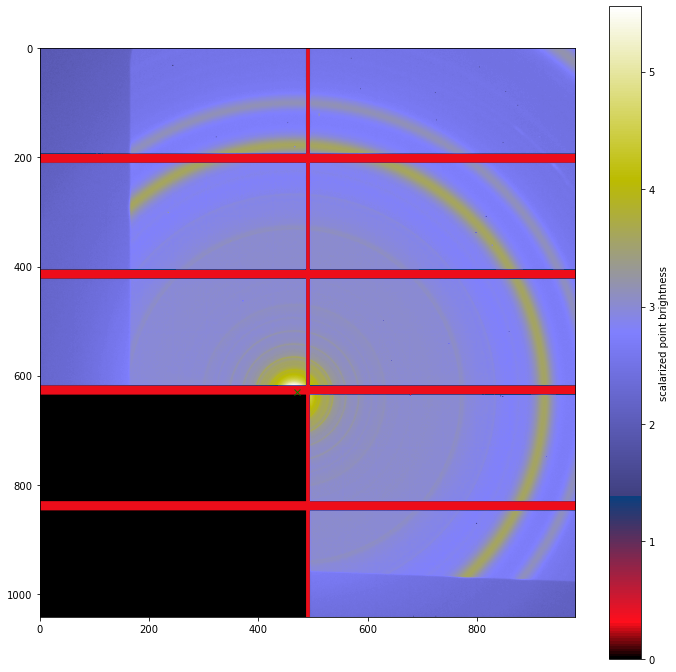

In [126]:
#guess center and radius by MANUAL INPUT
x=float(input("Enter guess for horizontal coordinate of center: "))
y=float(input("Enter guess for vertical coordinate of center: "))

guess=[x,y]

compare_img=Image.open(infile3).convert("I")
compare_img=np.asarray(compare_img).astype(float)



plt.figure(10, figsize=(12,12)); plt.clf()
plt.imshow(np.log10(compare_img+3), cmap="gist_stern") #for this scenario the number makes little difference. We just want to see the rings and center.
#changing the number changes the shading but the center is visible regardless of what it is
plt.colorbar(label="scalarized point brightness")

#plotting
plt.plot(x,y,"gx")

In [150]:
#this method is just the distance formula. You input x and y which is one coordinate and then a and which is the second.
def euclidean_distance(x,y,a,b):
    d=((a-x)**2+(b-y)**2)**0.5
    return d


#this method takes an array and if values are close together it "combines them". 
#It groups values that are less than 10 apart and then finds the average of these clusters. This forms a smaller array, 
#which is then averaged one more time. This value is outputted. 
def cluster_avg(val_list):
    hold_avgs=np.array([])
    hold_indices=np.array([])
    lastindex=0
    for j in range(len(val_list)-1):#we don't want to go out of bounds. so keep the j+1 from going too far.
        if(val_list[j+1]>(val_list[j]+10)): #The +10 is just a number I have to be the amount above to split. So if values differ by 10, the array splits between these indices.
            for k in range(lastindex, (j+1)): #go from previous cluster's last index to the next one that starts a new cluster.
                hold_indices=np.append(hold_indices, val_list[k]) #put the cluster's indices in an array
            hold_avgs=np.append(hold_avgs, np.nanmean(hold_indices)) #put the mean of the cluster's indices in an array
            hold_indices=np.array([]) #empty the array that holds the indices
            lastindex=j+1 # move the last index up so we will not look at the same cluster again in our for loop
    
        elif(val_list[j+1]==val_list[-1]):
            for k in range(lastindex, (j+1)): #go from previous cluster's last index to the next one that starts a new cluster. This doesn't include the final array element
                hold_indices=np.append(hold_indices, val_list[k]) #put the cluster's indices in an array
            hold_indices=np.append(hold_indices, val_list[-1]) #include the final element of save
            hold_avgs=np.append(hold_avgs, np.nanmean(hold_indices)) #put the mean of the cluster's indices in an array
            hold_indices=np.array([]) #empty the array that holds the indices
            lastindex=j+1 # move the last index up so we will not look at the same cluster again in our for loop
    avg_of_clusters=np.nanmean(hold_avgs)  #the average of the clusters we got in the row or column above the threshold
    
    return(avg_of_clusters)


#you input a list and the mode of the list is found
def mode_finder(list_input):
    vals,counts = np.unique(list_input, return_counts=True)
    mode = np.argmax(counts)
    true_mode=vals[mode]
    
    return(true_mode)


#This array takes the maximum value in a row. It then multiplies this value by a threshold 
#(between 0 and 1 noninclusive) to get a lowerbound
#It goes through the array, finding the indicies corresponding to values above this lowerbound. These indicies are put into 
#another array. The method cluster_avg is used on this array. The cluster_avg output is put into a storing array.
#This whole process is repeated for each row. and each output is appended to the storing array. 
#This storing array is the output of this method.
def one_dim_search_rows(array_input,threshold_value):
    hold_avg=np.array([])
    holding_array=np.array([])
    for a in range(len(array_input)):
        valmax=np.amax(array_input[a]) #get the actual max value in the array
        lowerbound=threshold_value*valmax #we want to see where values above this are. The high intensity values. I chose a 15% threshold.
        for i in range(len(array_input[a])): #go through one row at a time
            if img2[a][i]>lowerbound:
                holding_array=np.append(holding_array,i) #get indices of higher values in an array
        
        hold_avg=np.append(hold_avg,cluster_avg(holding_array))
        holding_array=np.array([])
        
    return(hold_avg)


#This is the exact same as the method above, but for columns. It was easier to make separate methods because 
#rows in general are accesed with array[z] while columns are array[:,z]
def one_dim_search_cols(array_input,threshold_value):
    hold_avg=np.array([])
    holding_array=np.array([])
    for b in range(len(array_input[0])): #go through every column and note that img2[0] is the size of the number of columns.
        valmax=np.amax(array_input[:,b]) #get the actual max value in that column. 
        lowerbound=threshold_value*valmax #we want to see where values above this are. The high intensity values. I chose a 15% threshold.
        for j in range(len(img2[:,b])): #go through each index of the column
            if img2[:,b][j]>lowerbound: #if the element is larger than our bound
                holding_array=np.append(holding_array,j) #get the indicies of the larger elements and add them all to a list
                
        hold_avg=np.append(hold_avg,cluster_avg(holding_array))
        holding_array=np.array([])
                
    return(hold_avg)



# this method uses the distace formula to see which point is the farthest from a certain point.
#Two arrays are inputted. The first has x-coordinates and the second has y-coordinates. The same indices form a point. These
#points are compared to a third array, which is actually just length 2 (this array is just an x and y coordinate).
#which ever of the x and y coordinates are closest to the third array are the coordinates kept.
def closest_point_index(input_array1, input_array2,compare_point):
    hold_index=0
    lowest_dist=euclidean_distance(input_array1[0],input_array2[0],compare_point[0],compare_point[1])
    for i in range(len(input_array1)):
        c=euclidean_distance(input_array1[i],input_array2[i],compare_point[0],compare_point[1])
        if c<lowest_dist:
            hold_index=i
    return(hold_index)



#this method just removes the repeated indices from the x-coordinate and y-coordinate arrays, thus removing repeated points
def two_dim_remove_repeat(val_list_x,val_list_y): 
    result =[] 
    for i in val_list_x: 
        if i not in result: 
            result.append(i)
    
    result2=[]
    for i in val_list_y: 
        if i not in result2: 
            result2.append(i)

    return(result+result2)














def circle_point(main_array,center_x,center_y,radius,trig_f1,trig_f2):
    point_x=round(center_x+radius*trig_f1)
    point_y=round(center_y+radius*trig_f2)
    if(point_x>=0 and point_y>=0):
        intensity=main_array[point_x][point_y]
        return(intensity)
    else:
        end=True
        return(end)





def helperloop(bool_list):
    value=0
    for i in all_end: 
        if i==True:
            value+=1
    if (value==len(bool_list)-1 or value==len(bool_list)): #the second part is there if they somehow end reach index 0 together
        end_run=True
    else:
        end_run=False
        
    return(end_run)



    


def extend_circle_outwards(center_x,center_y):
    
    
    x1=np.cos(0)
    y1=np.sin(0)
    x2=np.cos(np.pi/6)
    y2=np.sin(np.pi/6)
    x3=np.cos(np.pi/4)
    y3=np.sin(np.pi/4)
    x4=np.cos(np.pi/3)
    y4=np.sin(np.pi/3)
    x5=np.cos(np.pi/2)
    y5=np.sin(np.pi/2)
    
    end1=False
    end2=False
    end3=False
    end4=False
    end5=False
    end6=False
    end7=False
    end8=False
    end9=False
    end10=False
    end11=False
    end12=False
    end13=False
    end14=False
    end15=False
    end16=False
    
    end_run=False
    
    
    win_counter=0
    radius=1
    
    while(end_run==False): #when radius is small some points may be the same, but this should be true for every case so we don't 
                           #need to remove repeat points
    
    
    
        #point 1 at 0 degrees
        point1_x=round(center_x+radius*x1)
        point1_y=round(center_y+radius*y1)
        if(point1_x>=0 and point1_y>=0):
            intensity1=img2[point1_x][point1_y] 
        else:                                   
            end1=True

        

        #point 2 at 30 degrees
        point2_x=round(center_x+radius*x2)
        point2_y=round(center_y+radius*y2)
        if(point2_x>=0 and point2_y>=0):
            intensity2=img2[point2_x][point2_y]
        else:
            end2=True



        #point 3 at 45 degrees
        point3_x=round(center_x+radius*x3)
        point3_y=round(center_y+radius*y3)
        if(point3_x>=0 and point3_y>=0):
            intensity3=img2[point3_x][point3_y]
        else:
            end3=True



        #point 4 at 60 degrees
        point4_x=round(center_x+radius*x4)
        point4_y=round(center_y+radius*y4)
        if(point4_x>=0 and point4_y>=0):
            intensity4=img2[point4_x][point4_y]
        else:
            end4=True



        #point 5 at 90 degrees
        point5_x=round(center_x+radius*x5)
        point5_y=round(center_y+radius*y5)
        if(point5_x>=0 and point5_y>=0):
            intensity5=img2[point5_x][point5_y]
        else:
            end5=True



        #point 6 at 120 degrees
        point6_x=round(center_x+radius*-x4)
        point6_y=round(center_y+radius*y4)
        if(point6_x>=0 and point6_y>=0):
            intensity6=img2[point6_x][point6_y]
        else:
            end6=True



        #point 7 at 135 degrees
        point7_x=round(center_x+radius*-x3)
        point7_y=round(center_y+radius*y3)
        if(point7_x>=0 and point7_y>=0):
            intensity7=img2[point7_x][point7_y]
        else:
            end7=True



        #point 8 at 150 degrees
        point8_x=round(center_x+radius*-x2)
        point8_y=round(center_y+radius*y2)
        if(point8_x>=0 and point8_y>=0):
            intensity8=img2[point8_x][point8_y]
        else:
            end8=True



        #point 9 at 180 degrees
        point9_x=round(center_x+radius*-x1)
        point9_y=round(center_y+radius*y1)
        if(point9_x>=0 and point9_y>=0):
            intensity9=img2[point9_x][point9_y]
        else:
            end9=True



        #point 10 at 210 degrees
        point10_x=round(center_x+radius*-x2)
        point10_y=round(center_y+radius*-y2)
        if(point10_x>=0 and point10_y>=0):
            intensity10=img2[point10_x][point10_y]
        else:
            end10=True



        #point 11 at 225 degrees
        point11_x=round(center_x+radius*-x3)
        point11_y=round(center_y+radius*-y3)
        if(point11_x>=0 and point11_y>=0):
            intensity11=img2[point11_x][point11_y]
        else:
            end11=True



        #point 12 at 240 degrees
        point12_x=round(center_x+radius*-x4)
        point12_y=round(center_y+radius*-y4)
        if(point12_x>=0 and point12_y>=0):
            intensity12=img2[point12_x][point12_y]
        else:
            end12=True



        #point 13 at 270 degrees
        point13_x=round(center_x+radius*-x5)
        point13_y=round(center_y+radius*-y5)
        if(point13_x>=0 and point13_y>=0):
            intensity13=img2[point13_x][point13_y]
        else:
            end13=True



        #point 14 at 300 degrees
        point14_x=round(center_x+radius*x4)
        point14_y=round(center_y+radius*-y4)
        if(point14_x>=0 and point14_y>=0):
            intensity14=img2[point14_x][point14_y]
        else:
            end14=True



        #point 15 at 315 degrees
        point15_x=round(center_x+radius*x3)
        point15_y=round(center_y+radius*-y3)
        if(point15_x>=0 and point15_y>=0):
            intensity15=img2[point15_x][point15_y]
        else:
            end15=True



        #point 16 at 330 degrees
        point16_x=round(center_x+radius*x2)
        point16_y=round(center_y+radius*-y2)
        if(point16_x>=0 and point16_y>=0):
            intensity16=img2[point16_x][point16_y]
        else:
            end16=True



        all_end=np.array([end1,end2,end3,end4,end5,end6,end7,end8,end9,end10,end11,end12,end13,end14,end15,end16]) 
        #we want to know if 15 of the 16 points are done running. If so, the method is finished.
        end_run=helperloop(all_end)


        radius+=10


C:\Users\Bradley\AppData\Local\Temp/ipykernel_23880/3317224741.py:26: RuntimeWarning: Mean of empty slice
  avg_of_clusters=np.nanmean(hold_avgs)  #the average of the clusters we got in the row or column above the threshold


20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
Center: [465.5,636.5]


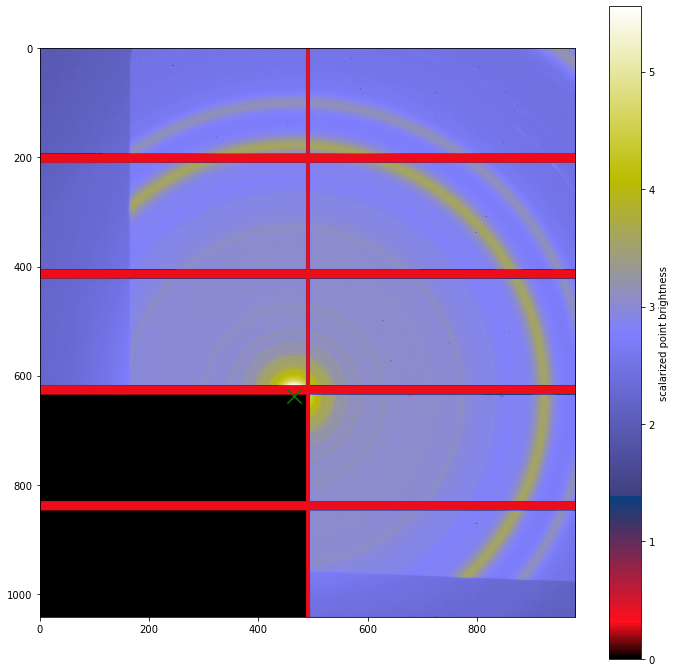

In [128]:
plt.figure(100, figsize=(12, 12))
plt.imshow(np.log10(img2+3), cmap="gist_stern")
cbar=plt.colorbar(label="scalarized point brightness")
#define the plot


threshold=0.999 #we set our initial threshold
count=20 #this count is just a good way of showing the user how much time is left in the runtime
         #each time count decreases is one loop through. Note that the time for each loop 
         #isn't linear so the count won't decrease at exactly the same rate (it will slow).

while(threshold>0):
    keep_mode=np.array([])
    keep_mode=np.append(keep_mode, mode_finder(one_dim_search_rows(img2,threshold)))
    keep_mode=np.append(keep_mode, mode_finder(one_dim_search_cols(img2,threshold)))
    #Here we put two elements in keep_mode. The first element is the x coordinate and the second is the y coordinate.
    #The img2 2D array representing the image intensity and current theshold are put into the two one_dim_search_ methods.
    #You then find the mode (with mode_finder) of the one_dim_search_ method. Refer above to see how these methods work.
    
    
    
    if(count==20):
        lowest_distance=euclidean_distance(keep_mode[0],keep_mode[1],guess[0],guess[1])
        saved_point_x=keep_mode[0]
        saved_point_y=keep_mode[1]
    else:
        if(lowest_distance>euclidean_distance(keep_mode[0],keep_mode[1],guess[0],guess[1])):
            lowest_distance=euclidean_distance(keep_mode[0],keep_mode[1],guess[0],guess[1])
            saved_point_x=keep_mode[0]
            saved_point_y=keep_mode[1]
    #This part right here just gets the first possible center (the x,y coordinates from keep_mode[0] and keep_mode[1] 
    #respectively) and sets it as the true center. 
    #It compares the true center's distance to the guess with the next possible center's (from the updated keep_mode[0] 
    #and keep_mode[1]) distance from the guess. 
    #Which ever one is closer to the guess position is kept and becomes (or stays) the true center. It goes through each while loop 
    #iteration comparing elements and keeps the one with the lowest distance from the guess. The one witht he lowest distance from
    #the guess in the end is the solution to the algorithm
    
    
    threshold-=0.05 #reduce the threshold. For one of these threshold the solution should appear
    print(count)
    count-=1
    
print("Center: ["+str(saved_point_x)+","+str(saved_point_y)+"]")
plt.scatter(saved_point_x, saved_point_y, marker="x", s=200, c="green")
#The true center (the one closet to the guess) is printed and plotted on the image.

C:\Users\Bradley\AppData\Local\Temp/ipykernel_23880/1335792038.py:29: RuntimeWarning: Mean of empty slice
  avg_of_clusters=np.nanmean(hold_avgs)  #the average of the clusters we got in the row or column above the threshold


20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1

Center: [853.5,185.5]
Center: [464.5,193.5]
Center: [465.0,636.5]
Center: [465.5,617.5]
Center: [465.25,617.0]
Center: [573.2138442521632,616.5]
Center: [572.7086419753086,616.0]
Center: [737.0,309.0]


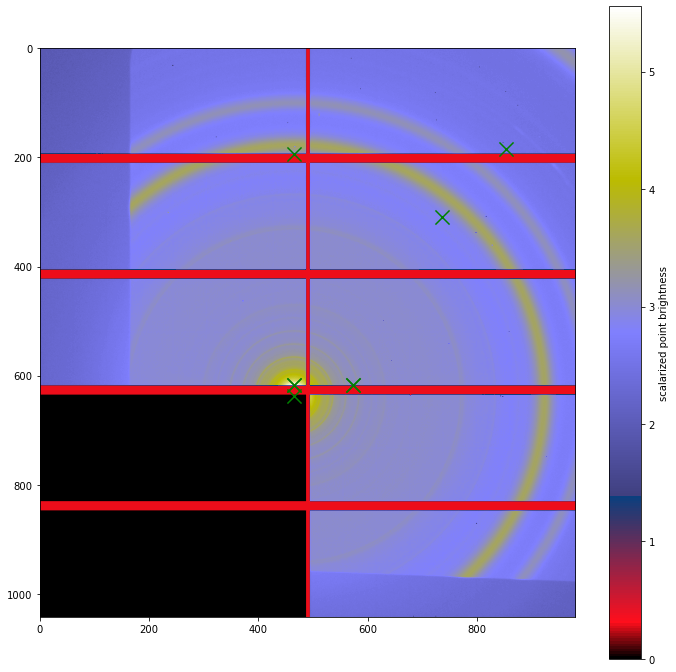

In [152]:
#plot to show all possible centers (if the same center was predicted multiple times, one is removed). So repeats are removed.
plt.figure(100, figsize=(12, 12))
plt.imshow(np.log10(img2+3), cmap="gist_stern")
cbar=plt.colorbar(label="scalarized point brightness")



threshold=0.999
count=20
saved_point_x=np.array([])
saved_point_y=np.array([])

while(threshold>0):
    keep_mode=np.array([])
    keep_mode=np.append(keep_mode, mode_finder(one_dim_search_rows(img2,threshold)))
    keep_mode=np.append(keep_mode, mode_finder(one_dim_search_cols(img2,threshold)))
    
    
    saved_point_x=np.append(saved_point_x,keep_mode[0])
    saved_point_y=np.append(saved_point_y,keep_mode[1])
    
    
    threshold-=0.05
    print(count)
    count-=1
    

    
hold=np.array([])  
hold=np.array_split(two_dim_remove_repeat(saved_point_x,saved_point_y),2)    
print()

for i in range(len(hold[0])):
    print("Center: ["+str(hold[0][i])+","+str(hold[1][i])+"]")
    plt.scatter(hold[0][i], hold[1][i], marker="x", s=200, c="green")

In [161]:
#we will have 8 points all going outwards from the center. If these 2 of points encounter similar intensity values (within 100) then
#add a counter for the center. If 3 points have similar values add 2 counters. If 4 then 3 counters and so on. The points can get
#no counters if they are negative or under 100. Once a coordinate hits the edge (has a 0 or max value for width or height)
#, stop it from continuing. This implies that when there is 1 point left we can just stop the function
#Add all of the counters up.
#The center will be the one with the most counters.
np.cos(np.pi/6)


0.8660254037844387